## **POWER QUALITY DISTURBANCES WITH PARAMETRIC EQUATIONS**
#### **Author:** Marcelo Estevão da Silva (Master of Science in Electrical and Computer Engineering)
#### **Affiliation:** Federal University of Ceara
#### **E-mail:** marcelo_marcelo@outlook.com
#### **GitHub:** github.com/estevao-marcelo/


### Libraries and parameters

In [1]:
import os
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
duration = 0.2  # in seconds
sampling_rate = 10000  # in Hz
frequency = 50  # em Hz (1 kHz)
period = 1/frequency

In [3]:
# Getting the time vector
time = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)

In [4]:
# Definition of the unit step function
def unit_step(t, t0):
    return 1.0 * (t >= t0)

In [20]:
# Chose a random signal to show
def choose_file(directory, prefix):
    # List all file name
    files_list = []

    # Cycle through all files in the directory
    for file_name in os.listdir(directory):
        # Checks if the file name starts with the specified prefix
        if file_name.startswith(prefix):
            files_list.append(file_name)

    return files_list

### Disturbance: Pure Sinusoid

In [5]:
category_disturbance = 'pure_sinusoid'
path_disturbance = os.path.join(os.getcwd(),category_disturbance,category_disturbance)
os.makedirs(category_disturbance,exist_ok=True)

In [6]:
# Getting the pure sinusoid signal
sinusoid = np.sin(2 * np.pi * frequency * time)

np.savetxt(path_disturbance+'.csv', sinusoid, header=category_disturbance, delimiter=',', comments='')

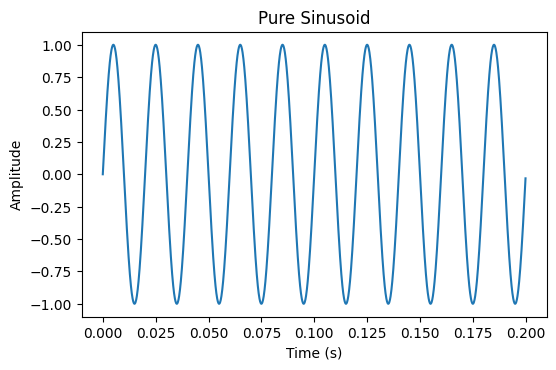

In [7]:
# Plotting the signal
plt.figure(figsize=(6, 3.7))
plt.plot(time, sinusoid)
plt.title('Pure Sinusoid')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(False)
plt.savefig(path_disturbance+'.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Disturbance: Sag

In [52]:
category_disturbance = 'sag'
path_disturbance = os.path.join(os.getcwd(),category_disturbance,category_disturbance)
os.makedirs(category_disturbance,exist_ok=True)

In [9]:
parameters = []
i = 1
for alpha in list(np.linspace(0.1,0.9,17)): # 0.1 <= alpha <= 0.9
    for n in list(np.linspace(1,9,15)):
        t1 = 0.0 # T <= t2 - t1 <= 9T
        t2 = t1+n*period # T <= t2 - t1 <= 9T
        w = 2 * np.pi * frequency # angular frequency for 50Hz
        delta_time = t2-t1
        
        if delta_time >= period and delta_time <= 9*period and alpha >= 0.1 and alpha <= 0.9:
            label = 'valid'
        else:
            label = 'invalid'

        parameter = f'Start time: {t1}, End time: {t2:.2f}, Alpha: {alpha:.2f} --- {label}'
        parameters.append(parameter)
        
        # Getting the sag signal
        sag = (1 - alpha * (unit_step(time, t1) - unit_step(time, t2))) * np.sin(w * time)

        # Saving the signal
        np.savetxt(path_disturbance+'_signal_'+str(i)+'.csv', sag, header=category_disturbance, delimiter=',', comments='')
        
        i += 1

# Saving the parameters
with open(path_disturbance+'_parameters_.txt', 'w') as file:
    for line in parameters:
        file.write(line + '\n')

In [55]:
chosen_signal = category_disturbance+'_signal_100.csv'
signal_value = np.genfromtxt(os.path.join(category_disturbance, chosen_signal), delimiter=',', skip_header=1, dtype=None)

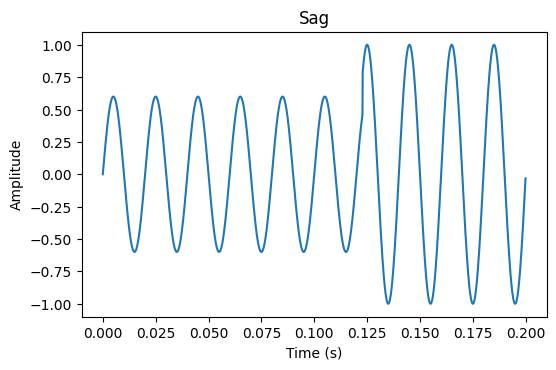

In [56]:
# Plotting the signal
plt.figure(figsize=(6, 3.7))
plt.plot(time, signal_value)
plt.title('Sag')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(False)
# plt.plot(time[d1:d2], 
#          sag[d1:d2], 
#          color='red', label='Destaque')
plt.savefig(path_disturbance+'.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Disturbance: Swell

In [38]:
category_disturbance = 'swell'
path_disturbance = os.path.join(os.getcwd(),category_disturbance,category_disturbance)
os.makedirs(category_disturbance,exist_ok=True)

In [39]:
parameters = []
i = 1
for alpha in list(np.linspace(0.1,0.8,17)): # 0.1 <= alpha <= 0.8
    for n in list(np.linspace(1,9,15)):
        t1 = 0.0 # T <= t2 - t1 <= 9T
        t2 = t1+n*period # T <= t2 - t1 <= 9T
        w = 2 * np.pi * frequency # angular frequency for 50Hz
        delta_time = t2-t1
        
        if delta_time >= period and delta_time <= 9*period and alpha >= 0.1 and alpha <= 0.9:
            label = 'valid'
        else:
            label = 'invalid'

        parameter = f'Start time: {t1}, End time: {t2:.2f}, Alpha: {alpha:.2f} --- {label}'
        parameters.append(parameter)
        
        # Getting the sag signal
        sag = (1 + alpha * (unit_step(time, t1) - unit_step(time, t2))) * np.sin(w * time)

        # Saving the signal
        np.savetxt(path_disturbance+'_signal_'+str(i)+'.csv', sag, header=parameter, delimiter=',', comments='')
        
        i += 1

# Saving the parameters
with open(path_disturbance+'_parameters.txt', 'w') as file:
    for line in parameters:
        file.write(line + '\n')

In [50]:
chosen_signal = 'swell_signal_200.csv'
signal_value = np.genfromtxt(os.path.join(category_disturbance, chosen_signal), delimiter=',', skip_header=1, dtype=None)

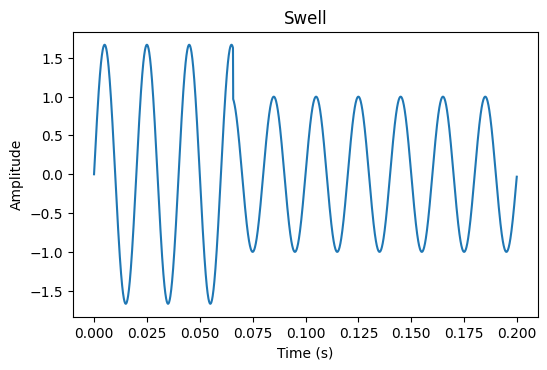

In [51]:
# Plotting the signal
plt.figure(figsize=(6, 3.7))
plt.plot(time, signal_value)
plt.title('Swell')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(False)
# plt.plot(time[d1:d2], 
#          sag[d1:d2], 
#          color='red', label='Destaque')
plt.savefig(path_disturbance+'.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [32]:
yy

[]